In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import sys
from scipy.constants import c
import warnings
warnings.filterwarnings("ignore")
plt.style.use("plot_style.mplstyle")

In [2]:
## Parameters
center_wavelength = 1310e-9
freq = c/(center_wavelength)
FSR_wavelength = 1600e9 * (center_wavelength)**2/(c)
channel_spacing = FSR_wavelength/8
channel1_wavelength = center_wavelength - 7.5*channel_spacing
channel16_wavelength = center_wavelength + 8.5*channel_spacing

In [3]:
def calculate_optimal_transfer_function(optmization_wavelength_sweep):
    optimal_transfer_function = np.array(
        [
            int(1*(i- 1310e-9 - channel_spacing/2)/channel_spacing % 2) for i in optimization_wavelength_sweep
        ]
    )
    return optimal_transfer_function

def RF_spectrum_56G(freq, optimization_wavelength_sweep):
    frequency_sweep = c/optimization_wavelength_sweep
    diff_freq = freq - frequency_sweep
    Tb = 1/(56e9)
    tp = np.array(
        [0.5 * Tb * (np.sin(np.pi*f*Tb)/(np.pi*f*Tb))**2 for f in diff_freq])
    tp /= np.max(tp)
    return tp

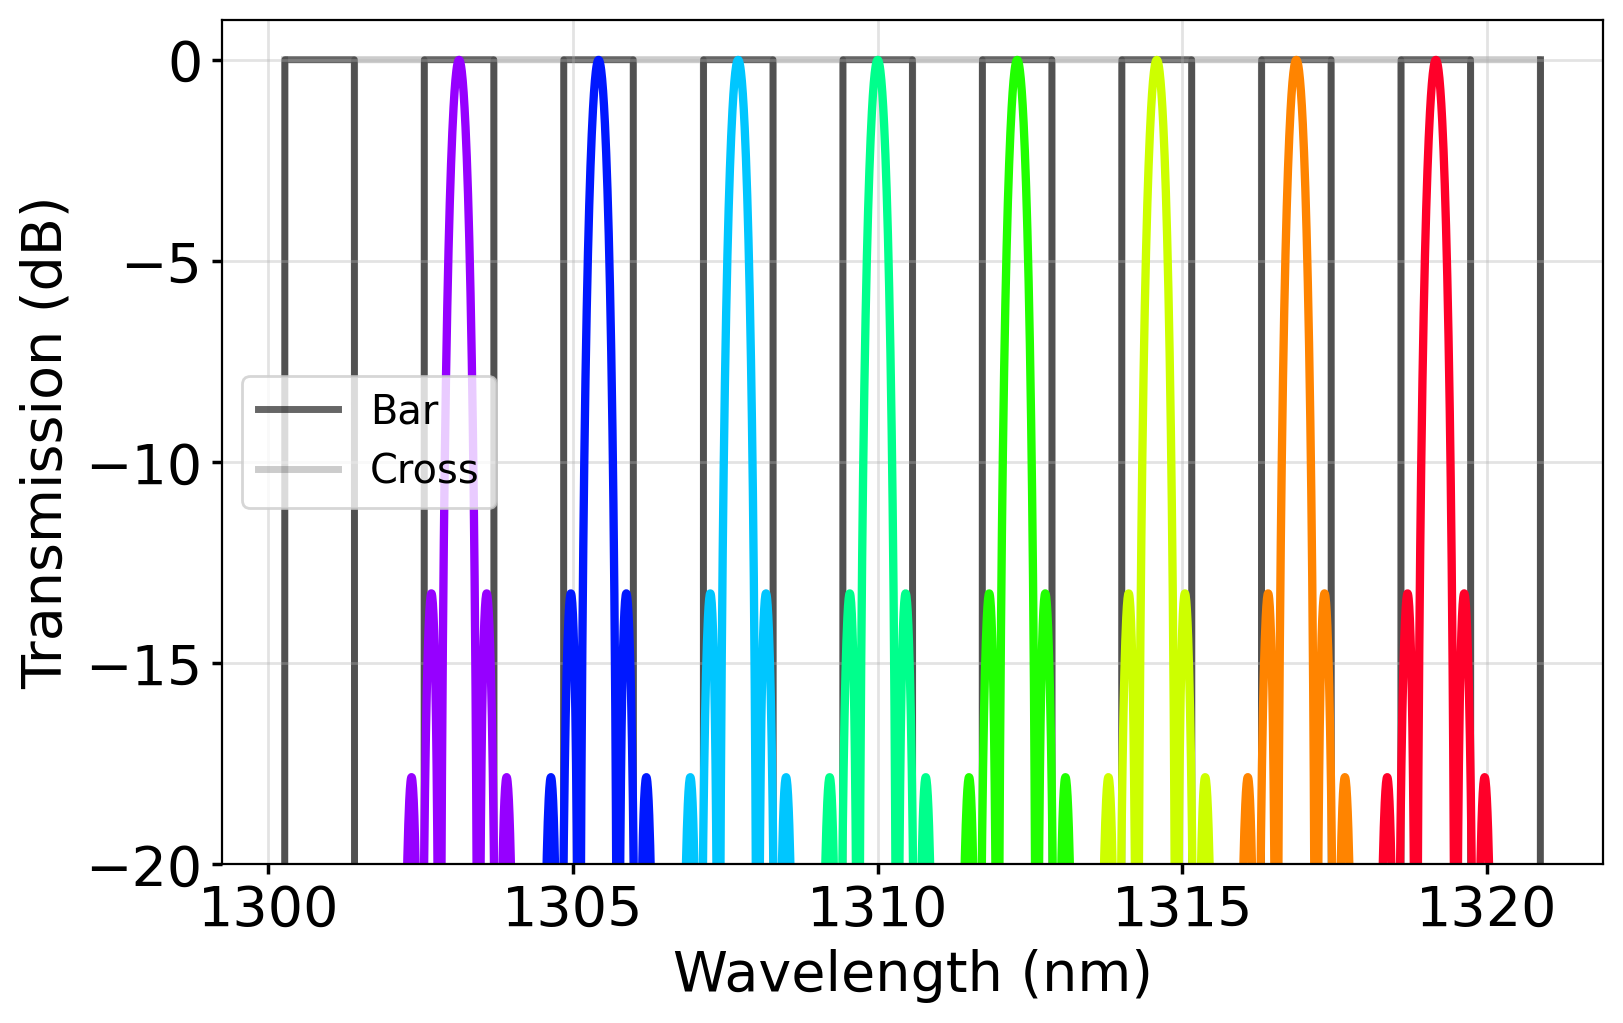

In [15]:
optimization_wavelength_sweep = np.linspace(channel1_wavelength-channel_spacing,channel16_wavelength+channel_spacing,num=4000)
cost_sweep = calculate_optimal_transfer_function(optimization_wavelength_sweep)

no_colors = 8
cm = plt.get_cmap('gist_rainbow')

plt.figure()
for i in range(-4,4):
    rf_spectrum = RF_spectrum_56G(c/(c/freq-2*i*channel_spacing), optimization_wavelength_sweep)
    plt.plot(optimization_wavelength_sweep*1e9, 10*np.log10(rf_spectrum),linewidth = 3.0, color=cm(1.*(i+4)/no_colors))

plt.plot(optimization_wavelength_sweep*1e9, 10*np.log10(cost_sweep+1.1e-3),
         zorder=-100, alpha=0.6, linestyle ='-', color='k', label='Bar')
plt.plot(optimization_wavelength_sweep*1e9, 10*np.log10(1-(cost_sweep)+1.1e-3),
         zorder=-100, alpha=0.2, linestyle ='-', color='k', label='Cross')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Transmission (dB)")
plt.legend()
plt.ylim(-20, 1)
plt.show()